# SONM active deal analyzer

## This notebook is to analyze active deals on the SONM platform in real-time.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt

### ipython magic to plot in a notebook

In [4]:
%matplotlib inline

### SONM's DWH spits out API information of active deals.  Using Jupyter's magic to run BASH command to save the API data to livedeal.txt

In [5]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":1}' > livedeal.txt

In [6]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":0}' > history.txt

### Open the saved text in Jupyter

In [7]:
f = open('history.txt','r')

### Convert opened file to Pandas dataframe.

In [8]:
k = f.readlines()

In [9]:
r = k[0].split(',')

In [10]:
headposition = []
i = 0
for item in r:
    if 'deal' in item:

        headposition.append(i)
    i = i+1

In [11]:
testlist = []
for i in range(len(headposition)):
    if headposition[i]>0:
        #print(int(headposition[i-1])-int(headposition[i]))
        # Selecting only spot deals
        if (int(headposition[i-1])-int(headposition[i])) == -30:
        #print(r[headposition[i-1] : headposition[i]])
        #print(int([headposition[i-1]])-int([headposition[i]]))
            testlist.append(r[headposition[i-1] : headposition[i]])

In [12]:
df = pd.DataFrame(testlist)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""endTime"":""2018-08-21T19:39:19Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""4339574211030764""","""lastBillTS"":""2018-08-21T19:39:19Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG..."
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""endTime"":""2018-07-09T23:17:37Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""2206734024270600""","""lastBillTS"":""2018-07-09T23:17:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT..."
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""endTime"":""2018-06-30T12:34:19Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""2064655339296484310""","""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT..."
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""endTime"":""2018-08-17T03:26:26Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""130123572271057257""","""lastBillTS"":""2018-08-17T03:26:26Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND..."
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""endTime"":""2018-08-19T02:57:53Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""11291858188194541""","""lastBillTS"":""2018-08-19T02:57:53Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND..."


In [14]:
df.shape

(4632, 30)

## Data Cleaning

### The 14 column contains consumer ID.  First clean this colum.

In [15]:
df[14]

0       "consumerID":"0x4e452D1EB085A15d3f9544Ffedf9F8...
1       "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
2       "consumerID":"0x517648Ec2E592969Ec344642034F07...
3       "consumerID":"0x417c92FbD944b125A578848DE44a4F...
4       "consumerID":"0x417c92FbD944b125A578848DE44a4F...
5       "consumerID":"0x517648Ec2E592969Ec344642034F07...
6       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
7       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
8       "consumerID":"0x417c92FbD944b125A578848DE44a4F...
9       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
10      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
11      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
12      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
13      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
14      "consumerID":"0x73208ae757b5a5747d79da4a08ba4F...
15      "consumerID":"0xcB9Bb24E33A4F0f482f7060e6D4a4C...
16      "consumerID":"0x417c92FbD944b125A578848DE44a4F...
17      "consu

### Make a little funtion to trim unnecessary charactors

In [16]:
def Supplier_ID_conversion(content):
    return content[14:-1]

###  And applyt to pandas data frame.  New column called consumer_ID is generated.

In [17]:
df['consumer_ID'] = df[14].apply(Supplier_ID_conversion)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,consumer_ID
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""4339574211030764""","""lastBillTS"":""2018-08-21T19:39:19Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""2206734024270600""","""lastBillTS"":""2018-07-09T23:17:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""2064655339296484310""","""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""130123572271057257""","""lastBillTS"":""2018-08-17T03:26:26Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""11291858188194541""","""lastBillTS"":""2018-08-19T02:57:53Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911


## supplier

###  Same trick for the supplier ID.  The 13 column contains supplier ID information.  Clean with the same function.

In [19]:
df[13]

0       "supplierID":"0xdEE7E9955b8e462bD661c692cd703F...
1       "supplierID":"0xE0babb8aB2cE8845B68e32a87d3352...
2       "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
3       "supplierID":"0x26200241593722FA17DE5722Ed66d8...
4       "supplierID":"0x1E575FB7dD8b28CEcAD9065A7aFD1a...
5       "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
6       "supplierID":"0xEBB9099c31EF1C72a2E597cD4c0205...
7       "supplierID":"0x2f90D7A115cFAf62ea05eDF0E5C7E9...
8       "supplierID":"0x734C2a165e57496169aAAEA6E22aE7...
9       "supplierID":"0x20bab6140Ec5fA53b5bEd974A1Ab99...
10      "supplierID":"0x26200241593722FA17DE5722Ed66d8...
11      "supplierID":"0x8D94E5A8B1F48268b389147FCd13B1...
12      "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
13      "supplierID":"0x10b8A639FB9c5D09c6b50B3Db27e63...
14      "supplierID":"0x2EeD5380B2eC7A88A99F8aE8179C04...
15      "supplierID":"0xfb2c6c866e1022C94377Dc4f31E1aa...
16      "supplierID":"0xd8B606a3D19C53E6Eea84ca5738D7D...
17      "suppl

In [20]:
df['supplier_ID'] = df[13].apply(Supplier_ID_conversion)

### Price

### Price value is shown as USD/s, so conver it to USD/h

In [21]:
unit = 10.0**18.0

4830442500000/unit * 60 *60

In [22]:
def Price_conversion(content):
    if 'price' in content:
        return float(content[9:-1])/unit * 60 *60
    if 'duration' in content:
        return float(content[11:-1])/unit * 60 * 60

In [23]:
df['price_USD/h'] = df[18].apply(Price_conversion)

###  ETH has rate

### The 10 column contains Ethash value.  Clean and convert to Mh/s.

In [24]:
df[10]

0               0
1        31458000
2        79806000
3        93131000
4        21959000
5        79806000
6        13125000
7        26543000
8        19778000
9        27518000
10       46570000
11       19441000
12       19934000
13       27459000
14              0
15              0
16      159643000
17       27470000
18       43417000
19              0
20       27470000
21       24722000
22              0
23       27470000
24      199602000
25       64894000
26       27470000
27       27470000
28      129853000
29       26670000
          ...    
4602     26624000
4603     19945000
4604     19964000
4605     19938000
4606     19939000
4607     19939000
4608     19938000
4609     19947000
4610     19955000
4611     26624000
4612     26624000
4613     26625000
4614     26635000
4615     19968000
4616     19968000
4617     19938000
4618     19939000
4619     26624000
4620     19939000
4621     19955000
4622     26624000
4623     19938000
4624     26625000
4625     19968000
4626     2

In [25]:
float(df[10][0])/1000000

0.0

In [26]:
def Ethash_conversion(content):
    return float(content)/1000000

In [27]:
Ethash_conversion(df[10][0])

0.0

In [28]:
df['Ethash'] = df[10].apply(Ethash_conversion)

In [29]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""lastBillTS"":""2018-08-21T19:39:19Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""lastBillTS"":""2018-07-09T23:17:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""lastBillTS"":""2018-08-17T03:26:26Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""lastBillTS"":""2018-08-19T02:57:53Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959


# deal ID


In [75]:
df[0]

0       {"deals":[{"deal":{"id":"4698"
1                  {"deal":{"id":"720"
2                    {"deal":{"id":"2"
3                 {"deal":{"id":"3963"
4                 {"deal":{"id":"4342"
5                    {"deal":{"id":"5"
6                    {"deal":{"id":"4"
7                    {"deal":{"id":"3"
8                 {"deal":{"id":"3891"
9                    {"deal":{"id":"9"
10                {"deal":{"id":"1190"
11                {"deal":{"id":"1392"
12                   {"deal":{"id":"7"
13                   {"deal":{"id":"8"
14                {"deal":{"id":"1381"
15                {"deal":{"id":"3624"
16                {"deal":{"id":"4704"
17                  {"deal":{"id":"14"
18                {"deal":{"id":"2218"
19                {"deal":{"id":"2279"
20                  {"deal":{"id":"12"
21                  {"deal":{"id":"15"
22                 {"deal":{"id":"455"
23                  {"deal":{"id":"16"
24                {"deal":{"id":"2317"
25                {"deal"

# new

In [30]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""lastBillTS"":""2018-08-21T19:39:19Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""lastBillTS"":""2018-07-09T23:17:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""lastBillTS"":""2018-08-17T03:26:26Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""lastBillTS"":""2018-08-19T02:57:53Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959


In [31]:
df[15]

0       "masterID":"0x24E192b02d33501f225580d6B19A8d97...
1       "masterID":"0x24ceb5Ec6D7C58bD519974A6Ba76F50c...
2       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
3       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
4       "masterID":"0xAAA932d77935EE3d8E0Ba1d464CFDA4E...
5       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
6       "masterID":"0xd0ecfF77c5B50BAB4D865CB1254A14dd...
7       "masterID":"0x517648Ec2E592969Ec344642034F079c...
8       "masterID":"0x6F6B9a47668D96b3758D79c67c30A290...
9       "masterID":"0xf5291bFDAA9324c42BEf942eCfC971EB...
10      "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
11      "masterID":"0x63dA2009Ff928f99D960F48CBDd76C5a...
12      "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
13      "masterID":"0xb3A8866183ca88ED3c233337C4f85045...
14      "masterID":"0xA48Dded52080d6a729E0CCbcb0f45bD7...
15      "masterID":"0xE9a8A72Ea514D70479c0db2E971355D4...
16      "masterID":"0x416Af57F633e292b25976573a460d7C3...
17      "maste

In [32]:
df[15][0]

'"masterID":"0x24E192b02d33501f225580d6B19A8d97C5190D45"'

In [33]:
df[15][0][12:-1]

'0x24E192b02d33501f225580d6B19A8d97C5190D45'

In [34]:
def Master_ID_conversion(content):
    return content[12:-1]

In [35]:
df['master_ID'] =  df[15].apply(Master_ID_conversion)

In [36]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,0x24E192b02d33501f225580d6B19A8d97C5190D45
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,0xedB7Ae4B946Cf249349974A02e354B5FBC577798
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,0xedB7Ae4B946Cf249349974A02e354B5FBC577798
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01


In [37]:
df[19]

0       "startTime":"2018-08-21T17:25:49Z"
1       "startTime":"2018-07-09T23:16:40Z"
2       "startTime":"2018-06-30T09:15:34Z"
3       "startTime":"2018-08-17T03:21:17Z"
4       "startTime":"2018-08-19T02:56:02Z"
5       "startTime":"2018-06-30T12:34:46Z"
6       "startTime":"2018-06-30T12:31:01Z"
7       "startTime":"2018-06-30T12:23:37Z"
8       "startTime":"2018-08-16T01:02:14Z"
9       "startTime":"2018-06-30T13:07:55Z"
10      "startTime":"2018-07-10T22:31:52Z"
11      "startTime":"2018-07-12T16:32:58Z"
12      "startTime":"2018-06-30T12:48:37Z"
13      "startTime":"2018-06-30T12:53:04Z"
14      "startTime":"2018-07-12T09:05:46Z"
15      "startTime":"2018-08-15T16:35:43Z"
16      "startTime":"2018-08-21T21:22:34Z"
17      "startTime":"2018-06-30T13:27:58Z"
18      "startTime":"2018-07-24T15:23:46Z"
19      "startTime":"2018-07-26T11:28:19Z"
20      "startTime":"2018-06-30T13:17:16Z"
21      "startTime":"2018-06-30T14:00:13Z"
22      "startTime":"2018-07-05T12:41:07Z"
23      "st

In [38]:
df[19][0]

'"startTime":"2018-08-21T17:25:49Z"'

In [39]:
df[19][0][12:]

'"2018-08-21T17:25:49Z"'

In [40]:
pd.to_datetime("2018-07-24T13:37:46Z")

Timestamp('2018-07-24 13:37:46')

In [41]:
pd.to_datetime(df[19][0][13:-1])

Timestamp('2018-08-21 17:25:49')

In [42]:
def convert_starttime(content):
    return pd.to_datetime(content[13:-1])

In [43]:
convert_starttime(df[19][4])

Timestamp('2018-08-19 02:56:02')

In [44]:
df['starttime']= df[19].apply(convert_starttime)

In [45]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID,starttime
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02


In [46]:
df[20][0][11:-1]

'2018-08-21T19:39:19Z'

In [47]:
def convert_endtime(content):
    return pd.to_datetime(content[11:-1])

In [48]:
df['endtime']= df[20].apply(convert_endtime)

In [49]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID,starttime,endtime
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53


In [50]:
df['duration']=df['endtime']-df['starttime']

In [51]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID,starttime,endtime,duration
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,02:13:30
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,00:00:57
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,00:05:09
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,00:01:51


In [52]:
df['duration']<'1 minute'

0       False
1        True
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24       True
25      False
26      False
27      False
28      False
29      False
        ...  
4602     True
4603    False
4604    False
4605     True
4606     True
4607     True
4608     True
4609    False
4610    False
4611     True
4612     True
4613    False
4614    False
4615    False
4616    False
4617    False
4618    False
4619     True
4620    False
4621    False
4622    False
4623     True
4624    False
4625    False
4626    False
4627    False
4628    False
4629    False
4630    False
4631    False
Name: duration, Length: 4632, dtype: bool

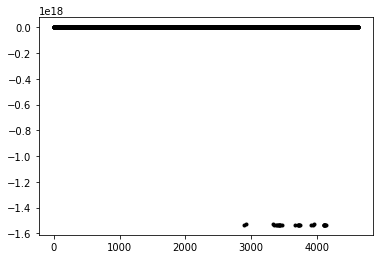

In [53]:
df['duration'].plot(style='k.')

In [54]:
df[df['duration']<'1 minute']['duration']

1      00:00:57
24     00:00:33
32     00:00:36
34     00:00:18
54     00:00:36
59     00:00:39
62     00:00:45
67     00:00:39
69     00:00:18
73     00:00:33
74     00:00:30
81     00:00:27
88     00:00:33
99     00:00:12
110    00:00:39
112    00:00:30
113    00:00:36
114    00:00:45
118    00:00:21
120    00:00:39
121    00:00:15
128    00:00:45
129    00:00:18
134    00:00:30
136    00:00:39
137    00:00:51
143    00:00:36
145    00:00:15
147    00:00:30
152    00:00:30
         ...   
4305   00:00:48
4403   00:00:27
4430   00:00:39
4440   00:00:57
4441   00:00:54
4450   00:00:12
4494   00:00:51
4517   00:00:48
4521   00:00:36
4538   00:00:27
4569   00:00:45
4583   00:00:54
4584   00:00:54
4585   00:00:54
4588   00:00:54
4596   00:00:30
4597   00:00:27
4598   00:00:51
4599   00:00:57
4600   00:00:54
4601   00:00:48
4602   00:00:54
4605   00:00:51
4606   00:00:51
4607   00:00:57
4608   00:00:57
4611   00:00:57
4612   00:00:54
4619   00:00:57
4623   00:00:48
Name: duration, Length: 

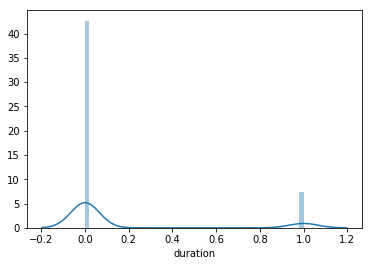

In [55]:
sns.distplot(df['duration']<'1 minute')

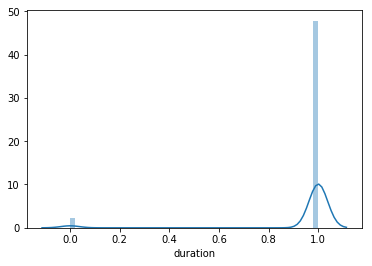

In [56]:
sns.distplot(df['duration']<'1 day')

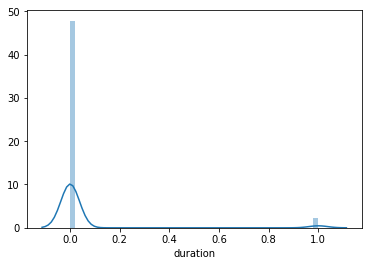

In [57]:
sns.distplot(df['duration']>'1 day')

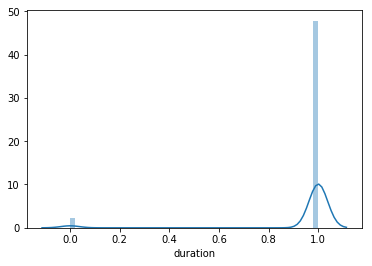

In [58]:
sns.distplot(df['duration']<'1 day')

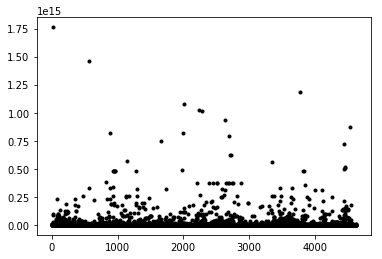

In [59]:
df[df['duration']>'1 minute']['duration'].plot(style='k.')

In [60]:
df2 = df.sort_values('duration')

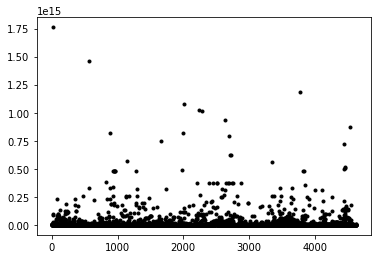

In [61]:
df2[df2['duration']>'1 minute']['duration'].plot(style='k.')

In [62]:
df2['duration'][820]

Timedelta('0 days 00:02:21')

In [63]:
df2['duration'][820].total_seconds()

141.0

df['total_days_td'] = df['time_delta'].dt.total_seconds()

In [65]:
df['duration_second'] = df['duration'].dt.total_seconds()

In [66]:
df

,0,1,2,3,4,5,6,7,8,9,...,29,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID,starttime,endtime,duration,duration_second
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,0 days 02:13:30,8010.0
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,0 days 00:00:57,57.0
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,0 days 03:18:45,11925.0
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,0 days 00:05:09,309.0
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,0 days 00:01:51,111.0
5,"{""deal"":{""id"":""5""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 12:34:46,2018-06-30 12:38:46,0 days 00:04:00,240.0
6,"{""deal"":{""id"":""4""","""benchmarks"":{""values"":[1002",1527,36,2000000000,67108864,10000000,10000000,1,4234149888,...,"""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0xEBB9099c31EF1C72a2E597cD4c02051C43C24Ebd,0.015535,13.125,0xd0ecfF77c5B50BAB4D865CB1254A14ddfA05A6F0,2018-06-30 12:31:01,2018-06-30 12:55:46,0 days 00:24:45,1485.0
7,"{""deal"":{""id"":""3""","""benchmarks"":{""values"":[1012",1636,8,2000000000,67108864,10000000,10000000,1,8513388544,...,"""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x2f90D7A115cFAf62ea05eDF0E5C7E9D819329A3d,0.013121,26.543,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-06-30 12:23:37,2018-06-30 13:49:10,0 days 01:25:33,5133.0
8,"{""deal"":{""id"":""3891""","""benchmarks"":{""values"":[108",1113,8,256000000,67108864,1000002,1000001,1,6368002048,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.018698,19.778,0x6F6B9a47668D96b3758D79c67c30A290934a759F,2018-08-16 01:02:14,2018-08-16 03:18:59,0 days 02:16:45,8205.0
9,"{""deal"":{""id"":""9""","""benchmarks"":{""values"":[1010",1293,2,2000000000,67108864,10000000,10000000,1,4288299008,...,"""consumerCertificates"":""W10=""}",0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x20bab6140Ec5fA53b5bEd974A1Ab99472b576163,0.015794,27.518,0xf5291bFDAA9324c42BEf942eCfC971EB95D56b33,2018-06-30 13:07:55,2018-06-30 13:12:55,0 days 00:05:00,300.0


In [70]:
df_negative = df[df['duration_second']<0]

In [74]:
df_negative[[0,'supplier_ID','master_ID','Ethash','starttime','endtime','duration']]

,0,supplier_ID,master_ID,Ethash,starttime,endtime,duration
2900,"{""deal"":{""id"":""4574""",0xe8D423ca11ED809565BFA247d974d6EB42eB2DBb,0x87d341DF84A64b5289cf8A504F22cC10F509E9d6,0.000,2018-08-20 07:12:26,1970-01-01,-17764 days +16:47:34
2920,"{""deal"":{""id"":""1397""",0xAe4fD4581D82C615105c798c73d1C33403d86ACB,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,0.000,2018-07-12 16:58:37,1970-01-01,-17725 days +07:01:23
3335,"{""deal"":{""id"":""1394""",0xC3C8b2915f62956066eD5C8719814e276A7B8C00,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,0.000,2018-07-12 16:49:22,1970-01-01,-17725 days +07:10:38
3349,"{""deal"":{""id"":""5094""",0x1A46613006bCACCA13b27B3b317edA65D726ef6b,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,19.806,2018-08-25 06:36:44,1970-01-01,-17769 days +17:23:16
3374,"{""deal"":{""id"":""5089""",0x38B904701577720d4Eb06b5d28A7bd02a443711F,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,172.350,2018-08-25 05:50:20,1970-01-01,-17769 days +18:09:40
3389,"{""deal"":{""id"":""5107""",0x4FC67349467228BF3e57A8eaAf135D93C3558239,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,173.197,2018-08-25 14:12:05,1970-01-01,-17769 days +09:47:55
3408,"{""deal"":{""id"":""5108""",0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,172.039,2018-08-25 14:14:41,1970-01-01,-17769 days +09:45:19
3424,"{""deal"":{""id"":""3457""",0x8546601F9b4AcF1dc99C72cc48ED243d119cca95,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.000,2018-08-12 17:30:49,1970-01-01,-17756 days +06:29:11
3432,"{""deal"":{""id"":""5097""",0x8A9e1C48E12a4288B29b8709603f9202e64b4745,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,19.874,2018-08-25 07:21:17,1970-01-01,-17769 days +16:38:43
3439,"{""deal"":{""id"":""5098""",0x2f1B94E3813d66967a478031889F230D805130Ec,0x424129085f9b7F0Cc07c47D077206d835a2A7B2b,30.105,2018-08-25 09:24:11,1970-01-01,-17769 days +14:35:49


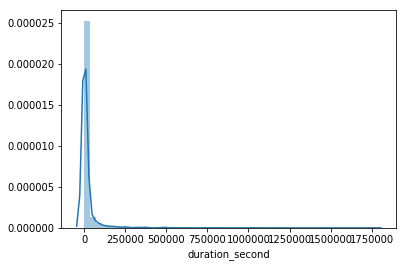

In [67]:
sns.distplot(df[df['duration_second']>60]['duration_second'])

In [ ]:
sns.set()

In [ ]:
df['duration_minute'] = df['duration_second']/60

In [ ]:
sns.distplot(df[df[['duration_second']>60]&[df[['duration_second']<60000]]['duration_minute'])

In [ ]:
df[df[['duration_second']>60] & [df['duration_second']<60000]]

In [210]:
df[df2['duration']<'0 second']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID,starttime,endtime,duration
2890,"{""deal"":{""id"":""4574""","""benchmarks"":{""values"":[660",1320,1,512000000,2000000000,2000000,4000000,0,0,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ZT...",0xe7517190DB97Ea55E985abdA33745AfC41a83592,0xe8D423ca11ED809565BFA247d974d6EB42eB2DBb,0.000000,0.000,0x87d341DF84A64b5289cf8A504F22cC10F509E9d6,2018-08-20 07:12:26,1970-01-01,-17764 days +16:47:34
2911,"{""deal"":{""id"":""1397""","""benchmarks"":{""values"":[105",1020,24,4194304,67108864,1200,1000,0,0,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0xAe4fD4581D82C615105c798c73d1C33403d86ACB,0.000000,0.000,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,2018-07-12 16:58:37,1970-01-01,-17725 days +07:01:23
3323,"{""deal"":{""id"":""1394""","""benchmarks"":{""values"":[103",905,72,4194304,67108864,1200,1000,0,0,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0xC3C8b2915f62956066eD5C8719814e276A7B8C00,0.000000,0.000,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2018-07-12 16:49:22,1970-01-01,-17725 days +07:10:38
3443,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.028091,32.454,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-08-22 21:15:13,1970-01-01,-17766 days +02:44:47
3643,"{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.023186,26.663,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-08-22 21:15:43,1970-01-01,-17766 days +02:44:17
3687,"{""deal"":{""id"":""4953""","""benchmarks"":{""values"":[120",1095,2,256000000,67108864,1000000,1000000,10,3163553792,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.204600,219.539,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-24 11:35:22,1970-01-01,-17768 days +12:24:38
3689,"{""deal"":{""id"":""4835""","""benchmarks"":{""values"":[108",1113,8,512000000,67108864,1000000,1000001,1,6368002048,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Nk...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.017390,19.778,0x6F6B9a47668D96b3758D79c67c30A290934a759F,2018-08-22 21:09:25,1970-01-01,-17766 days +02:50:35
3712,"{""deal"":{""id"":""4448""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4QU...",0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 14:49:23,1970-01-01,-17763 days +09:10:37
3714,"{""deal"":{""id"":""3469""","""benchmarks"":{""values"":[1002",538,8,256000000,67108864,1000000,1000000,0,0,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7Cc1C96E6c20D6265531196d9ca2b3199fF8Ef9E,0.000010,0.000,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,2018-08-12 18:01:22,1970-01-01,-17756 days +05:58:38
3729,"{""deal"":{""id"":""4830""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,"""suppli

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


TypeError: Cannot cast ufunc less input from dtype('float64') to dtype('<m8[ns]') with casting rule 'same_kind'

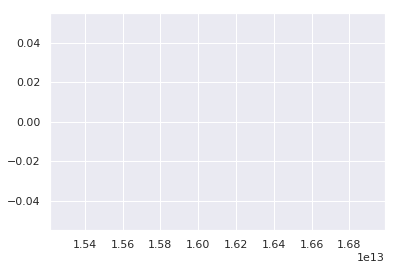

In [213]:
sns.distplot(df[df2['duration']>'0 second']['duration'])

In [159]:
len(df)

4605

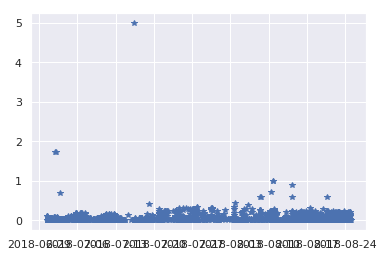

In [167]:
plt.plot(df['starttime'], df['price_USD/h'],'*')

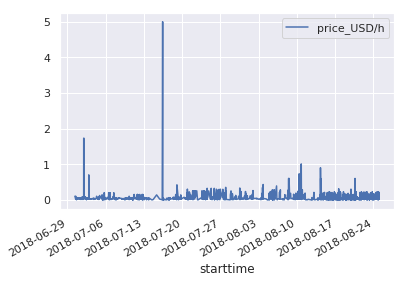

In [165]:
df.plot(x='starttime', y='price_USD/h')

In [164]:
sns.set()

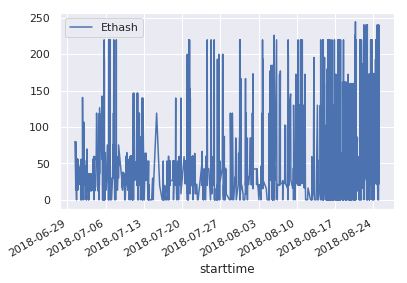

In [166]:
df.plot(x='starttime', y='Ethash')

# Run statistics for suppliers

In [223]:
df.groupby('supplier_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
supplier_ID,,,,,,,,
0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,2.0,86.0195,80.814527,28.875,57.44725,86.0195,114.59175,143.164
0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,1.0,133.2030,NaN,133.203,133.20300,133.2030,133.20300,133.203
0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,1.0,21.9590,NaN,21.959,21.95900,21.9590,21.95900,21.959
0x26200241593722FA17DE5722Ed66d8830dc58C6D,1.0,219.5390,NaN,219.539,219.53900,219.5390,219.53900,219.539
0x2f1B94E3813d66967a478031889F230D805130Ec,1.0,30.1050,NaN,30.105,30.10500,30.1050,30.10500,30.105
0x323FB5f356088ae979F12f27f94013e449BC62df,1.0,0.0000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,2.0,21.7110,0.005657,21.707,21.70900,21.7110,21.71300,21.715
0x38B904701577720d4Eb06b5d28A7bd02a443711F,1.0,172.3500,NaN,172.350,172.35000,172.3500,172.35000,172.350
0x4FC67349467228BF3e57A8eaAf135D93C3558239,1.0,173.1970,NaN,173.197,173.19700,173.1970,173.19700,173.197


In [224]:
df10 = df.groupby('supplier_ID').describe()['Ethash']

In [225]:
df10.to_csv('eth.csv')

In [226]:
df11 = pd.read_csv('eth.csv')

In [227]:
df11['total_Ethash']= df11['count']*df11['mean']

In [228]:
df11[['supplier_ID','total_Ethash','count']]

,supplier_ID,total_Ethash,count
0,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.039,2.0
1,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,133.203,1.0
2,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,21.959,1.0
3,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0
4,0x2f1B94E3813d66967a478031889F230D805130Ec,30.105,1.0
5,0x323FB5f356088ae979F12f27f94013e449BC62df,0.000,1.0
6,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,43.422,2.0
7,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,1.0
8,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.197,1.0
9,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0


In [229]:
df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

,supplier_ID,total_Ethash,count
3,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0
9,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
8,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.197,1.0
7,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,1.0
0,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.039,2.0
24,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0
1,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,133.203,1.0
10,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0
18,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.326,1.0
20,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,2.0


In [230]:
df12 = df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

In [231]:
df12.to_csv('ethash.csv', index = False)

In [232]:
df13 = pd.read_csv('ethash.csv')

In [233]:
df13

,supplier_ID,total_Ethash,count
0,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
2,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.197,1.0
3,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,1.0
4,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.039,2.0
5,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0
6,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,133.203,1.0
7,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0
8,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.326,1.0
9,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,2.0


In [234]:
df13['total_Ethash'].sum()

1612.1689999999999

In [235]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s')

Real-time total Ethash rate of the entire SONM platform is 1612.169 Mh/s


## supplier's revenue

In [236]:
df13['supplier_ID'][0]

'0x26200241593722FA17DE5722Ed66d8830dc58C6D'

In [237]:
df[df.supplier_ID == df13['supplier_ID'][0]]['price_USD/h'].sum()

0.20459999999999878

In [238]:
def total_revenue(address):
    return df[df.supplier_ID == address]['price_USD/h'].sum()

In [239]:
total_revenue(df13['supplier_ID'][0])

0.20459999999999878

In [240]:
df13['total_revenue_USD/h'] = df13['supplier_ID'].apply(total_revenue)

In [241]:
df13.dtypes

supplier_ID             object
total_Ethash           float64
count                  float64
total_revenue_USD/h    float64
dtype: object

In [242]:
df13['total_revenue_USD/d'] = df13['total_revenue_USD/h'] *24

In [243]:
df13['revenue_USD/d'] = df13['total_revenue_USD/d'].map('${:,.2f}'.format)

In [244]:
df13.head()

,supplier_ID,total_Ethash,count,total_revenue_USD/h,total_revenue_USD/d,revenue_USD/d
0,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0,0.204600,4.910400,$4.91
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0,0.186366,4.472783,$4.47
2,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.197,1.0,0.153831,3.691944,$3.69
3,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,1.0,0.154052,3.697258,$3.70
4,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.039,2.0,0.153980,3.695524,$3.70


In [245]:
sns.set()

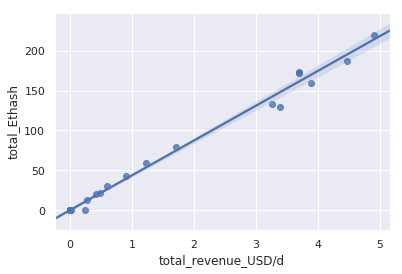

In [246]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/d", data=df13)

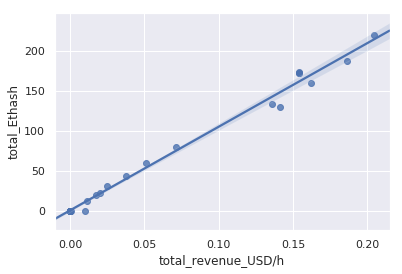

In [247]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/h", data=df13)

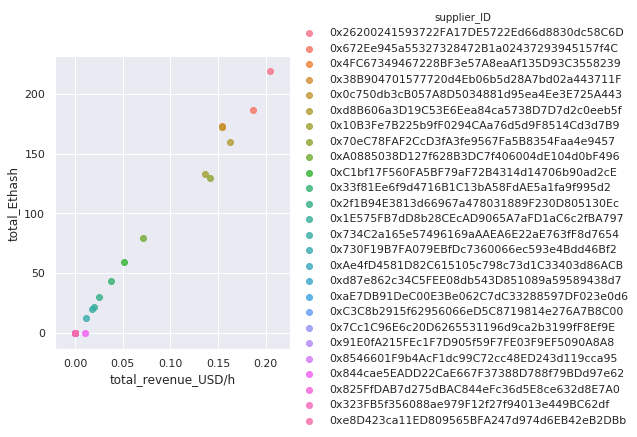

In [248]:
sns.lmplot( y="total_Ethash", x="total_revenue_USD/h", data=df13, fit_reg=False, hue='supplier_ID', legend=True)

In [249]:
df13[['supplier_ID','total_Ethash','count','revenue_USD/d']]

,supplier_ID,total_Ethash,count,revenue_USD/d
0,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0,$4.91
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0,$4.47
2,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.197,1.0,$3.69
3,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,1.0,$3.70
4,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.039,2.0,$3.70
5,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0,$3.89
6,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,133.203,1.0,$3.26
7,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0,$3.39
8,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.326,1.0,$1.71
9,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,2.0,$1.23


In [250]:
df13['total_revenue_USD/d'].sum()

36.88961800106425

In [251]:
df13['total_revenue_USD/d'].sum()

36.88961800106425

In [252]:
"{:.2f}".format(df13['total_revenue_USD/d'].sum())

'36.89'

In [253]:
print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day is spent on the entire SONM platform.')

At this moment, total 36.89 USD/day is spent on the entire SONM platform.


# Run the same statistics for consumers

In [254]:
df.groupby('consumer_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,14.0,60.062571,84.436200,0.000,0.000,0.000,132.36725,219.539
0x417c92FbD944b125A578848DE44a4FD9132E0911,11.0,68.121273,63.468765,19.778,24.189,30.105,111.24500,173.197
0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.00000,0.000
0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.95900,21.959
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000
0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000
0xe7517190DB97Ea55E985abdA33745AfC41a83592,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000


In [255]:
df10 = df.groupby('consumer_ID').describe()['Ethash']

In [256]:
df10.to_csv('consumer.csv')

In [257]:
df11 = pd.read_csv('consumer.csv')

In [258]:
df11['total_Ethash']= df11['mean']*df11['count']

In [259]:
df11

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,14.0,60.062571,84.436200,0.000,0.000,0.000,132.36725,219.539,840.876
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,11.0,68.121273,63.468765,19.778,24.189,30.105,111.24500,173.197,749.334
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.00000,0.000,0.000
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.95900,21.959,21.959
5,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000
6,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000
7,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000
8,0xe7517190DB97Ea55E985abdA33745AfC41a83592,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000


In [260]:
def total_expense(address):
    return df[df.consumer_ID == address]['price_USD/h'].sum()

In [261]:
df11['total_expense_USD/h'] = df11['consumer_ID'].apply(total_expense)

In [262]:
df11['total_expense_USD/d'] = df11['total_expense_USD/h'] *24

In [263]:
df11['expense_USD/d'] = df11['total_expense_USD/d'].map('${:,.2f}'.format)

In [264]:
df11.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,14.0,60.062571,84.436200,0.000,0.000,0.000,132.36725,219.539,840.876,8.425604e-01,2.022145e+01,$20.22
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,11.0,68.121273,63.468765,19.778,24.189,30.105,111.24500,173.197,749.334,6.643669e-01,1.594480e+01,$15.94
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000,3.110400e-10,7.464960e-09,$0.00
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.95900,21.959,21.959,2.014018e-02,4.833642e-01,$0.48


In [265]:
df11.sort_values(['total_Ethash','count'], ascending = False)

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,14.0,60.062571,84.436200,0.000,0.000,0.000,132.36725,219.539,840.876,8.425604e-01,2.022145e+01,$20.22
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,11.0,68.121273,63.468765,19.778,24.189,30.105,111.24500,173.197,749.334,6.643669e-01,1.594480e+01,$15.94
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.95900,21.959,21.959,2.014018e-02,4.833642e-01,$0.48
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000,3.110400e-10,7.464960e-09,$0.00
5,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000,1.000000e-02,2.400000e-01,$0.24
6,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
7,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
8,0xe7517190DB97Ea55E985abdA33745AfC41a83592,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00


In [266]:
df11 = df11.sort_values(['total_Ethash','count'], ascending = False)

In [267]:
df11.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,14.0,60.062571,84.436200,0.000,0.000,0.000,132.36725,219.539,840.876,8.425604e-01,2.022145e+01,$20.22
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,11.0,68.121273,63.468765,19.778,24.189,30.105,111.24500,173.197,749.334,6.643669e-01,1.594480e+01,$15.94
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.95900,21.959,21.959,2.014018e-02,4.833642e-01,$0.48
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000,3.110400e-10,7.464960e-09,$0.00


In [268]:
df11[['consumer_ID', 'total_Ethash', 'count','expense_USD/d']].sort_values(['total_Ethash','count'], ascending = False)

,consumer_ID,total_Ethash,count,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,840.876,14.0,$20.22
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,749.334,11.0,$15.94
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,21.959,1.0,$0.48
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0.000,3.0,$0.00
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,0.000,1.0,$0.00
5,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0.000,1.0,$0.24
6,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,0.000,1.0,$0.00
7,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,0.000,1.0,$0.00
8,0xe7517190DB97Ea55E985abdA33745AfC41a83592,0.000,1.0,$0.00


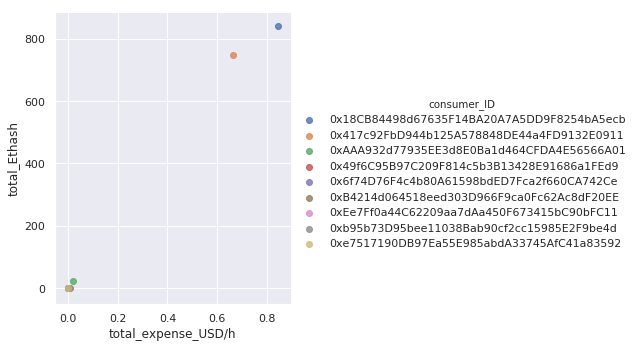

In [269]:
sns.lmplot( y="total_Ethash", x="total_expense_USD/h", data=df11, fit_reg=False, hue='consumer_ID', legend=True)

# Connor's deals

In [270]:
df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash
3,"{""deal"":{""id"":""4835""","""benchmarks"":{""values"":[108",1113,8,512000000,67108864,1000000,1000001,1,6368002048,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Nk...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.017390,19.778
4,"{""deal"":{""id"":""4830""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Yj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.715
9,"{""deal"":{""id"":""4818""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Yj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.707
12,"{""deal"":{""id"":""5062""","""benchmarks"":{""values"":[108",990,2,512000000,67108864,1000000,1000000,1,8518508544,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,0.024524,28.875
13,"{""deal"":{""id"":""5061""","""benchmarks"":{""values"":[108",990,2,512000000,67108864,1000000,1000000,5,7926202368,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,0.129456,143.164
21,"{""deal"":{""id"":""4881""","""benchmarks"":{""values"":[104",1062,4,512000000,67108864,1000000,1000000,1,8512339968,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2f1B94E3813d66967a478031889F230D805130Ec,0.025210,30.105
22,"{""deal"":{""id"":""5046""","""benchmarks"":{""values"":[108",1094,2,512000000,67108864,1000000,1000000,6,8507097088,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x38B904701577720d4Eb06b5d28A7bd02a443711F,0.154052,172.350
23,"{""deal"":{""id"":""4943""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000000,1000000,4,6372196352,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.071172,79.326
25,"{""deal"":{""id"":""5077""","""benchmarks"":{""values"":[103",989,2,512000000,67108864,1000000,1000000,6,8016764928,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x4FC67349467228BF3e57A8eaAf135D93C3558239,0.153831,173.197
28,"{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A5788

In [271]:
df12 = df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

In [272]:
df12 = df12.sort_values(['Ethash', 'price_USD/h'], ascending = False)

In [273]:
df12[['consumer_ID', 'supplier_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,price_USD/h,Ethash,0
25,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x4FC67349467228BF3e57A8eaAf135D93C3558239,0.153831,173.197,"{""deal"":{""id"":""5077"""
22,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x38B904701577720d4Eb06b5d28A7bd02a443711F,0.154052,172.350,"{""deal"":{""id"":""5046"""
13,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,0.129456,143.164,"{""deal"":{""id"":""5061"""
23,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.071172,79.326,"{""deal"":{""id"":""4943"""
29,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.028091,32.454,"{""deal"":{""id"":""4836"""
21,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2f1B94E3813d66967a478031889F230D805130Ec,0.025210,30.105,"{""deal"":{""id"":""4881"""
12,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,0.024524,28.875,"{""deal"":{""id"":""5062"""
28,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.023186,26.663,"{""deal"":{""id"":""4837"""
4,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.715,"{""deal"":{""id"":""4830"""
9,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.707,"{""deal"":{""id"":""4818"""


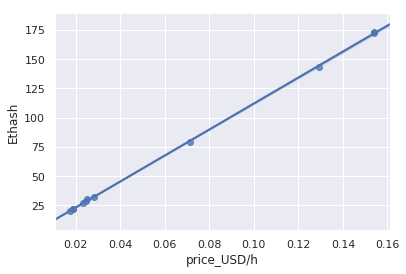

In [274]:
sns.regplot( y="Ethash", x="price_USD/h", data=df12)

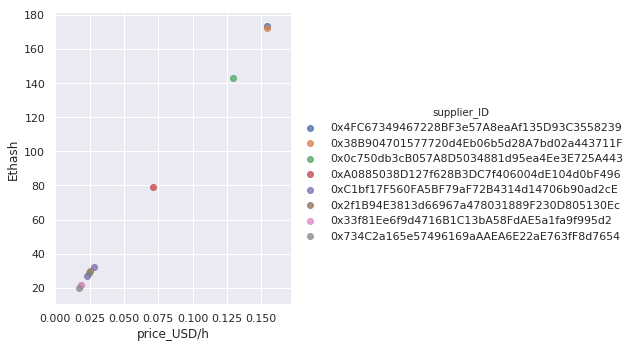

In [275]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df12, fit_reg=False, hue='supplier_ID', legend=True)

In [276]:
0.194853 * 1.05

0.20459565000000002

# Conclusions

In [289]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s.')

print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day are spent on the entire SONM platform.')

print('Connor currently has '+ str(len(df12)) + ' deals.')

print('Connor currently pays ' + str("{:.2f}".format(df12['price_USD/h'].sum()*24)) + " USD/day.") 

print('Connor currently mines ETH with ' + str(df12['Ethash'].sum()) + ' Mh/s hashrate.')

print('There are '+ str(len(df13))+ ' unique suppliers at this moment.')

print('There are ' + str(len(df13[df13['total_Ethash']>0])) + ' unique GPU sppliers at this moment.')

print('There are ' + str(len(df13)-len(df13[df13['total_Ethash']>0])) + ' unique CPU sppliers at this moment.')

print('There are '+ str(len(df11))+ ' unique consumers at this moment.')

print('Currenlty, there are total '+ str(len(df)) + ' deals.')

print('Of which ' + str(len(df[df.Ethash>0])) + ' deals contain GPU.')

print('And ' + str(len(df[df.Ethash==0])) + ' deals are CPU only.')




Real-time total Ethash rate of the entire SONM platform is 1612.169 Mh/s.
At this moment, total 36.89 USD/day are spent on the entire SONM platform.
Connor currently has 11 deals.
Connor currently pays 15.94 USD/day.
Connor currently mines ETH with 749.334 Mh/s hashrate.
There are 26 unique suppliers at this moment.
There are 15 unique GPU sppliers at this moment.
There are 11 unique CPU sppliers at this moment.
There are 9 unique consumers at this moment.
Currenlty, there are total 34 deals.
Of which 18 deals contain GPU.
And 16 deals are CPU only.


In [194]:
rate = 0.0008574 * 0.96

In [195]:
0.0008574 * 0.96

0.000823104

In [196]:
Mhs = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220]

In [197]:
for item in Mhs:
    print("{:.8f}".format(item*rate), item)

('0.00823104', 10)
('0.01646208', 20)
('0.02469312', 30)
('0.03292416', 40)
('0.04115520', 50)
('0.04938624', 60)
('0.05761728', 70)
('0.06584832', 80)
('0.07407936', 90)
('0.08231040', 100)
('0.09054144', 110)
('0.09877248', 120)
('0.10700352', 130)
('0.11523456', 140)
('0.12346560', 150)
('0.13169664', 160)
('0.13992768', 170)
('0.14815872', 180)
('0.15638976', 190)
('0.16462080', 200)
('0.17285184', 210)
('0.18108288', 220)
